# Final Pipeline

Goal is to get number of objects that would have been called stars if survey properties were constant. This will use the binning approach to calculating probability functions, and no PCA will be used, which should hopefully speed up the process substantially, especially when expanding to the full sky.

Note, everything is done at a full 4096 resolution.

## Imports

In [1]:
import sys
sys.path.insert(1, '/afs/hep.wisc.edu/home/kkboone/software/stellar_ssi_corrections_y3_balrog/python/')
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import astropy.io.fits as fits
from astropy.table import Table
import healpy as hp
import healsparse as hsp
import skyproj
from os import listdir
import astropy.units as u
from astropy.coordinates import SkyCoord
import Config
import StellarConfig as strConfig
from CropSurveyProperties import *
from GetObjects import *
from Classification import *
from Detection import *

## Hyper Parameters

In [2]:
detIndLim = strConfig.detIndLim
claIndLim = strConfig.claIndLim

In [3]:
res = strConfig.res
perCovered = strConfig.perCovered
nsideCourse = strConfig.nsideCourse
fracPer = strConfig.fracPer
numMagBins = strConfig.numMagBins
numBins = strConfig.numBins
classCutoff = strConfig.classCutoff
goldCols = Config.goldCols
gCut = strConfig.gCut
magBins = strConfig.magBins
cutOffPercent = strConfig.cutOffPercent
binNum = strConfig.binNum
matchDist = strConfig.matchDist

deepCols = Config.deepCols

## Isochrone Configuration

In [4]:
path = strConfig.path
mu = strConfig.mu

## Files

In [5]:
stellarDir = strConfig.stellarDir

matBalrGalaFile = Config.matBalrGalaFile
detBalrGalaFile = Config.detBalrGalaFile
matBalrStarFile = Config.matBalrStarFile
detBalrStarFile = Config.detBalrStarFile

matGalaFile = strConfig.matGalaFile
detGalaAllPosFile = strConfig.detGalaAllPosFile

matStarFile = strConfig.matStarFile
detStarAllPosFile = strConfig.detStarAllPosFile

deepFiles = Config.deepFiles

origCondFiles = Config.origCondFiles
stelFile = Config.stelFile
pixFile = strConfig.pixFile
condFiles = strConfig.condFiles

galaExtrFiles = strConfig.galaExtrFiles
galaTrainFiles = strConfig.galaTrainFiles
galaProbFiles = strConfig.galaProbFiles

galaDetAsStarExtrFiles = strConfig.galaDetAsStarExtrFiles
galaDetAsStarTrainFiles = strConfig.galaDetAsStarTrainFiles
galaDetAsStarProbFiles = strConfig.galaDetAsStarProbFiles

galaDetAsGalaExtrFiles = strConfig.galaDetAsGalaExtrFiles
galaDetAsGalaTrainFiles = strConfig.galaDetAsGalaTrainFiles
galaDetAsGalaProbFiles = strConfig.galaDetAsGalaProbFiles

# galaDetAsAnyExtrFiles = strConfig.galaDetAsAnyExtrFiles
# galaDetAsAnyTrainFiles = strConfig.galaDetAsAnyTrainFiles
# galaDetAsAnyProbFiles = strConfig.galaDetAsAnyProbFiles

starExtrFiles = strConfig.starExtrFiles
starTrainFiles = strConfig.starTrainFiles
starProbFiles = strConfig.starProbFiles

starDetAsStarExtrFiles = strConfig.starDetAsStarExtrFiles
starDetAsStarTrainFiles = strConfig.starDetAsStarTrainFiles
starDetAsStarProbFiles = strConfig.starDetAsStarProbFiles

starDetAsGalaExtrFiles = strConfig.starDetAsGalaExtrFiles
starDetAsGalaTrainFiles = strConfig.starDetAsGalaTrainFiles
starDetAsGalaProbFiles = strConfig.starDetAsGalaProbFiles

# starDetAsAnyExtrFiles = strConfig.starDetAsAnyExtrFiles
# starDetAsAnyTrainFiles = strConfig.starDetAsAnyTrainFiles
# starDetAsAnyProbFiles = strConfig.starDetAsAnyProbFiles

goldStarFiles = strConfig.goldStarFiles
goldGalaFiles = strConfig.goldGalaFiles

goldObjectsDir = Config.goldObjectsDir
goldObjectsFiles = Config.goldObjectsFiles

goldMoreInfoStarFiles = strConfig.goldMoreInfoStarFiles
goldMoreInfoGalaFiles = strConfig.goldMoreInfoGalaFiles

calibrationFile = strConfig.calibrationFile

## Get Pixels and Conditions

In [6]:
# validPixCropData(origCondFiles, stelFile, pixFile, condFiles, res, perCovered)

In [7]:
validPix = fitsio.read(pixFile)['PIXEL']
pixCheck = np.full(12*(res**2), False, dtype = bool)
pixCheck[validPix] = True

## Get Synthetic Objects

In [8]:
# Get Stars:
# getMatStars(path, mu, res, matBalrStarFile, detBalrStarFile, pixFile, matStarFile, gCut, classCutoff)
# getDetStarPositions(res, detBalrStarFile, pixFile, detStarAllPosFile)

# Get Galaxies:
# getMatGalas(path, mu, res, deepFiles, matBalrGalaFile, detBalrGalaFile, pixFile, matGalaFile, gCut, classCutoff)
# getDetGalaPositions(res, deepFiles, detBalrGalaFile, pixFile, detGalaAllPosFile)

## Training

### Correct Classification Probabilities:

In [9]:
# Start and end inds to hopefully guarantee no crashing occurs
# startInds = 2 * np.arange(50)
# endInds = (2 * np.arange(50)) + 1

# # Star classification

# singleCorrectionTrain(matStarFile, condFiles, pixFile, magBins, starTrainFiles, starProbFiles, starExtrFiles, numBins, res, True, classCutoff, binNum, cutOffPercent, doFullSky = False, indLenLim = claIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(starTrainFiles)):
#     if loadtxt(starTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSky(pixFile, condFiles, np.array([starTrainFiles[i]]), np.array([starProbFiles[i]]), np.array([starExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveAcc = loadtxt(starTrainFiles[i][0:-5] + '_Ave_Acc.csv', delimiter=',')
#         aveAcc = 1 * aveAcc

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveAcc * np.ones(len(validPix))
#         prob_table.write(starProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(starExtrFiles[i], overwrite = True)

In [10]:
# # Galaxy classification
# singleCorrectionTrain(matGalaFile, condFiles, pixFile, magBins, galaTrainFiles, galaProbFiles, galaExtrFiles, numBins, res, False, classCutoff, binNum, cutOffPercent, doFullSky = False, indLenLim = claIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(galaTrainFiles)):
#     if loadtxt(galaTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     print(i)
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSky(pixFile, condFiles, np.array([galaTrainFiles[i]]), np.array([galaProbFiles[i]]), np.array([galaExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveAcc = loadtxt(galaTrainFiles[i][0:-5] + '_Ave_Acc.csv', delimiter=',')
#         aveAcc = 1 * aveAcc

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveAcc * np.ones(len(validPix))
#         prob_table.write(galaProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(galaExtrFiles[i], overwrite = True)

### Detection Rate Variations:

In [11]:
# # Star det as star
# singleCorrectionTrainDet(detStarAllPosFile, matStarFile, condFiles, pixFile, magBins, starDetAsStarTrainFiles, starDetAsStarProbFiles, starDetAsStarExtrFiles, numBins, res, True, classCutoff, binNum, cutOffPercent, doFullSky = False, indLenLim = detIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(starDetAsStarTrainFiles)):
#     if loadtxt(starDetAsStarTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSkyDet(pixFile, condFiles, np.array([starDetAsStarTrainFiles[i]]), np.array([starDetAsStarProbFiles[i]]), np.array([starDetAsStarExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveDet = loadtxt(starDetAsStarTrainFiles[i][0:-5] + '_Ave_Det.csv', delimiter=',')
#         aveDet = 1 * aveDet

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveDet * np.ones(len(validPix))
#         prob_table.write(starDetAsStarProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(starDetAsStarExtrFiles[i], overwrite = True)

In [12]:
# # Gala det as star
# singleCorrectionTrainDet(detGalaAllPosFile, matGalaFile, condFiles, pixFile, magBins, galaDetAsStarTrainFiles, galaDetAsStarProbFiles, galaDetAsStarExtrFiles, numBins, res, True, classCutoff, binNum, cutOffPercent, doFullSky = False, indLenLim = detIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(galaDetAsStarTrainFiles)):
#     if loadtxt(galaDetAsStarTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSkyDet(pixFile, condFiles, np.array([galaDetAsStarTrainFiles[i]]), np.array([galaDetAsStarProbFiles[i]]), np.array([galaDetAsStarExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveDet = loadtxt(galaDetAsStarTrainFiles[i][0:-5] + '_Ave_Det.csv', delimiter=',')
#         aveDet = 1 * aveDet

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveDet * np.ones(len(validPix))
#         prob_table.write(galaDetAsStarProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(galaDetAsStarExtrFiles[i], overwrite = True)

In [13]:
# # Star det as gala
# singleCorrectionTrainDet(detStarAllPosFile, matStarFile, condFiles, pixFile, magBins, starDetAsGalaTrainFiles, starDetAsGalaProbFiles, starDetAsGalaExtrFiles, numBins, res, False, classCutoff, binNum, cutOffPercent, doFullSky = False, indLenLim = detIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(starDetAsGalaTrainFiles)):
#     if loadtxt(starDetAsGalaTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSkyDet(pixFile, condFiles, np.array([starDetAsGalaTrainFiles[i]]), np.array([starDetAsGalaProbFiles[i]]), np.array([starDetAsGalaExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveDet = loadtxt(starDetAsGalaTrainFiles[i][0:-5] + '_Ave_Det.csv', delimiter=',')
#         aveDet = 1 * aveDet

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveDet * np.ones(len(validPix))
#         prob_table.write(starDetAsGalaProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(starDetAsGalaExtrFiles[i], overwrite = True)

In [14]:
# # Gala det as gala
# singleCorrectionTrainDet(detGalaAllPosFile, matGalaFile, condFiles, pixFile, magBins, galaDetAsGalaTrainFiles, galaDetAsGalaProbFiles, galaDetAsGalaExtrFiles, numBins, res, False, classCutoff, binNum, cutOffPercent, doFullSky = False, indLenLim = detIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(galaDetAsGalaTrainFiles)):
#     if loadtxt(galaDetAsGalaTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSkyDet(pixFile, condFiles, np.array([galaDetAsGalaTrainFiles[i]]), np.array([galaDetAsGalaProbFiles[i]]), np.array([galaDetAsGalaExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveDet = loadtxt(galaDetAsGalaTrainFiles[i][0:-5] + '_Ave_Det.csv', delimiter=',')
#         aveDet = 1 * aveDet

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveDet * np.ones(len(validPix))
#         prob_table.write(galaDetAsGalaProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(galaDetAsGalaExtrFiles[i], overwrite = True)

### Detected as Any

This is used in presentation to DES MWWG

In [15]:
# # Star det as any
# singleCorrectionTrainDet(detStarAllPosFile, matStarFile, condFiles, pixFile, magBins, starDetAsAnyTrainFiles, starDetAsAnyProbFiles, starDetAsAnyExtrFiles, numBins, res, True, 3.5, binNum, cutOffPercent, doFullSky = False, indLenLim = detIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(starDetAsAnyTrainFiles)):
#     if loadtxt(starDetAsAnyTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSkyDet(pixFile, condFiles, np.array([starDetAsAnyTrainFiles[i]]), np.array([starDetAsAnyProbFiles[i]]), np.array([starDetAsAnyExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveDet = loadtxt(starDetAsAnyTrainFiles[i][0:-5] + '_Ave_Det.csv', delimiter=',')
#         aveDet = 1 * aveDet

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveDet * np.ones(len(validPix))
#         prob_table.write(starDetAsAnyProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(starDetAsAnyExtrFiles[i], overwrite = True)

In [16]:
# # Gala det as any
# singleCorrectionTrainDet(detGalaAllPosFile, matGalaFile, condFiles, pixFile, magBins, galaDetAsAnyTrainFiles, galaDetAsAnyProbFiles, galaDetAsAnyExtrFiles, numBins, res, True, 3.5, binNum, cutOffPercent, doFullSky = False, indLenLim = detIndLim)

# fullSkyBool = [True, True, True]
# for i in range(len(galaDetAsAnyTrainFiles)):
#     if loadtxt(galaDetAsAnyTrainFiles[i][0:-5] + '_Indices.csv', delimiter=',').astype(int).size == 0:
#         fullSkyBool[i] = False

# for i in range(3):
#     if fullSkyBool[i]:
#         for j in range(50):
#             fullSkyDet(pixFile, condFiles, np.array([galaDetAsAnyTrainFiles[i]]), np.array([galaDetAsAnyProbFiles[i]]), np.array([galaDetAsAnyExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j])
#     else:
#         aveDet = loadtxt(galaDetAsAnyTrainFiles[i][0:-5] + '_Ave_Det.csv', delimiter=',')
#         aveDet = 1 * aveDet

#         prob_table = Table()
#         prob_table['SIGNAL'] = aveDet * np.ones(len(validPix))
#         prob_table.write(galaDetAsAnyProbFiles[i], overwrite = True) 

#         ext_table = Table()
#         ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
#         ext_table.write(galaDetAsAnyExtrFiles[i], overwrite = True)

## Get Gold Objects

In [17]:
# StarPIX = []
# GalaPIX = []

# StarRA = []
# StarDEC = []

# GalaRA = []
# GalaDEC = []

# StarRMAG = []
# StarGMAG = []

# GalaRMAG = []
# GalaGMAG = []

# for _ in range(numMagBins):
    
#     StarPIX.append(np.array([]))
#     StarRA.append(np.array([]))
#     StarDEC.append(np.array([]))
#     StarRMAG.append(np.array([]))
#     StarGMAG.append(np.array([]))
    
#     GalaPIX.append(np.array([]))
#     GalaRA.append(np.array([]))
#     GalaDEC.append(np.array([]))
#     GalaRMAG.append(np.array([]))
#     GalaGMAG.append(np.array([]))
    
# for j in range(len(goldObjectsFiles)):
#     if j%100 == 0:
#         print(j)
#     obsData = fitsio.read(goldObjectsDir + goldObjectsFiles[j], columns = goldCols)
#     FOREGROUND = obsData[goldCols[0]]
#     BADREGIONS = obsData[goldCols[1]]
#     FOOTPRINT = obsData[goldCols[2]]
#     CLASS = obsData[goldCols[3]]
#     GMAG = obsData[goldCols[4]]
#     RMAG = obsData[goldCols[5]]
#     GMAG_GALA = obsData[goldCols[6]]
#     RMAG_GALA = obsData[goldCols[7]]
#     RA = obsData[goldCols[8]]
#     DEC = obsData[goldCols[9]]
#     PIX = hp.ang2pix(res, RA, DEC, lonlat = True, nest = True)

#     # General Quality Cuts
#     qualityCut = np.where((FOREGROUND == 0) &
#                           (BADREGIONS < 2) &
#                           (FOOTPRINT == 1) &
#                           (pixCheck[PIX]))[0]

#     CLASS = CLASS[qualityCut]
#     GMAG = GMAG[qualityCut]
#     RMAG = RMAG[qualityCut]
#     GMAG_GALA = GMAG_GALA[qualityCut]
#     RMAG_GALA = RMAG_GALA[qualityCut]
#     PIX = PIX[qualityCut]
#     RA = RA[qualityCut]
#     DEC = DEC[qualityCut]

#     # Observed Star Objects

#     blueStarCut = np.where((CLASS <= classCutoff) & 
#                       (CLASS >= 0) &
#                       (GMAG < gCut))[0]

#     STARRA = RA[blueStarCut]
#     STARDEC = DEC[blueStarCut]
#     STARPIX = PIX[blueStarCut]
#     STARGMAG = GMAG[blueStarCut]
#     STARRMAG = RMAG[blueStarCut]
    
#     for i in np.arange(numMagBins):
#         minRMAG = magBins[i]
#         maxRMAG = magBins[i + 1]
#         magCut = np.where((STARRMAG <= maxRMAG) & (STARRMAG > minRMAG))[0]
        
#         magStarRa = STARRA[magCut]
#         magStarDec = STARDEC[magCut]
#         magStarGmag = STARGMAG[magCut]
#         magStarRmag = STARRMAG[magCut]
#         magStarPix = STARPIX[magCut]

#         isoStarCut = Path.contains_points(path,np.vstack((magStarGmag - magStarRmag, magStarGmag - mu)).T)

#         StarRA[i] = np.append(StarRA[i], magStarRa[isoStarCut])
#         StarDEC[i] = np.append(StarDEC[i], magStarDec[isoStarCut])
#         StarPIX[i] = np.append(StarPIX[i], magStarPix[isoStarCut])
#         StarRMAG[i] = np.append(StarRMAG[i], magStarRmag[isoStarCut])
#         StarGMAG[i] = np.append(StarGMAG[i], magStarGmag[isoStarCut])

#     # Observed Galaxy Objects

#     blueGalaCut = np.where((CLASS <= 3) & 
#                       (CLASS >= classCutoff) &
#                       (GMAG_GALA < gCut))[0]

#     GALARA = RA[blueGalaCut]
#     GALADEC = DEC[blueGalaCut]
#     GALAPIX = PIX[blueGalaCut]
#     GALAGMAG = GMAG_GALA[blueGalaCut]
#     GALARMAG = RMAG_GALA[blueGalaCut]
    
#     for i in np.arange(numMagBins):
        
#         minRMAG = magBins[i]
#         maxRMAG = magBins[i + 1]
#         magCut = np.where((GALARMAG <= maxRMAG) & (GALARMAG > minRMAG))[0]
        
#         magGalaRa = GALARA[magCut]
#         magGalaDec = GALADEC[magCut]
#         magGalaGmag = GALAGMAG[magCut]
#         magGalaRmag = GALARMAG[magCut]
#         magGalaPix = GALAPIX[magCut]

#         isoGalaCut = Path.contains_points(path,np.vstack((magGalaGmag - magGalaRmag, magGalaGmag - mu)).T)

#         GalaRA[i] = np.append(GalaRA[i], magGalaRa[isoGalaCut])
#         GalaDEC[i] = np.append(GalaDEC[i], magGalaDec[isoGalaCut])
#         GalaPIX[i] = np.append(GalaPIX[i], magGalaPix[isoGalaCut])
#         GalaRMAG[i] = np.append(GalaRMAG[i], magGalaRmag[isoGalaCut])
#         GalaGMAG[i] = np.append(GalaGMAG[i], magGalaGmag[isoGalaCut])

# for i in range(numMagBins):
#     my_table = Table()
#     my_table['RA'] = StarRA[i].astype(float)
#     my_table['DEC'] = StarDEC[i].astype(float)
#     my_table['RMAG'] = StarRMAG[i].astype(float)
#     my_table['GMAG'] = StarGMAG[i].astype(float)
#     my_table.write(goldMoreInfoStarFiles[i], overwrite = True)
    
#     my_table = Table()
#     my_table['RA'] = GalaRA[i].astype(float)
#     my_table['DEC'] = GalaDEC[i].astype(float)
#     my_table['RMAG'] = GalaRMAG[i].astype(float)
#     my_table['GMAG'] = GalaGMAG[i].astype(float)
#     my_table.write(goldMoreInfoGalaFiles[i], overwrite = True)

In [18]:
# for j in np.arange(len(StarPIX)):

#     starPixRepeats = StarPIX[j]

#     # This will be used to store the number of stars at each pixel.
#     starPix, starDet = np.unique(starPixRepeats, return_counts = True) # The unique pixels, with no repeats.
    
#     fullSkyStars = np.full(12*(res**2), 0.0)
#     fullSkyStars[starPix.astype(int)] = starDet

#     my_table = Table()
#     my_table['SIGNAL'] = fullSkyStars[validPix]
#     my_table.write(goldStarFiles[j], overwrite = True)

In [19]:
# for j in np.arange(len(GalaPIX)):

#     galaPixRepeats = GalaPIX[j]

#     # This will be used to store the number of stars at each pixel.
#     galaPix, galaDet = np.unique(galaPixRepeats, return_counts = True) # The unique pixels, with no repeats.

#     fullSkyGalas = np.full(12*(res**2), 0.0)
#     fullSkyGalas[galaPix.astype(int)] = galaDet

#     my_table = Table()
#     my_table['SIGNAL'] = fullSkyGalas[validPix]
#     my_table.write(goldGalaFiles[j], overwrite = True)

## Deep Field Calibrations

In [20]:
def findMatches(angleCutoff, RASource, DECSource, RAMatchCatalog, DECMatchCatalog, nthneighbor=1):
    c = SkyCoord(ra=RASource*u.degree, dec=DECSource*u.degree)
    catalog = SkyCoord(ra=RAMatchCatalog*u.degree, dec=DECMatchCatalog*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog, nthneighbor=nthneighbor)
    matches = d2d < angleCutoff
    return matches, d2d

In [21]:
# deepRA = np.array([])
# deepDEC = np.array([])
# deepClass = np.array([])
# deepFlag = np.array([])
# deepFlagNir = np.array([])

# for deepFile in deepFiles:
#     deepData = fitsio.read(deepFile, columns = deepCols)

#     deepRA = np.append(deepRA, deepData['RA'])
#     deepDEC = np.append(deepDEC, deepData['DEC'])
#     deepClass = np.append(deepClass, deepData['KNN_CLASS'])
#     deepFlag = np.append(deepFlag, deepData['MASK_FLAGS'])
#     deepFlagNir = np.append(deepFlagNir, deepData['MASK_FLAGS_NIR'])

# deepFlagCuts = np.where((deepFlag == 0) &
#                         (deepFlagNir == 0) &
#                         (deepRA < 120) &
#                         (deepClass > 0) &
#                         (deepClass <= 3))[0]

# deepRA = deepRA[deepFlagCuts]
# deepDEC = deepDEC[deepFlagCuts]
# deepClass = deepClass[deepFlagCuts]

# if len(np.where(deepClass == 3)[0]) != 0:
#     print('WARNING: Objects with no class are present in this deep field selection. ' + str(len(np.where(deepClass == 3)[0])) + ' object(s) out of ' + str(len(deepClass)) + ' have an ambiguous classification.')

# deepPix = np.unique(hp.ang2pix(res, deepRA, deepDEC, lonlat = True, nest = True))

# deepPixCheck = np.full(12*(res**2), False, dtype = bool)
# deepPixCheck[deepPix] = True

In [22]:
# starAdjustments = []
# galaAdjustments = []

# for i in np.arange(len(goldMoreInfoStarFiles)):
#     allStarData = fitsio.read(goldMoreInfoStarFiles[i])
#     allStarRA = allStarData['RA']
#     allStarDEC = allStarData['DEC']
#     allStarPIX = hp.ang2pix(res, allStarRA, allStarDEC, lonlat = True, nest = True)
#     allStarRA = allStarRA[np.where(deepPixCheck[allStarPIX])[0]]
#     allStarDEC = allStarDEC[np.where(deepPixCheck[allStarPIX])[0]]
#     print(len(allStarRA))

#     allGalaData = fitsio.read(goldMoreInfoGalaFiles[i])
#     allGalaRA = allGalaData['RA']
#     allGalaDEC = allGalaData['DEC']
#     allGalaPIX = hp.ang2pix(res, allGalaRA, allGalaDEC, lonlat = True, nest = True)
#     allGalaRA = allGalaRA[np.where(deepPixCheck[allGalaPIX])[0]]
#     allGalaDEC = allGalaDEC[np.where(deepPixCheck[allGalaPIX])[0]]
#     print(len(allGalaRA))
    
#     deepStarMatches, _ = findMatches(0.5*u.arcsec, deepRA, deepDEC, allStarRA, allStarDEC)
#     deepGalaMatches, _ = findMatches(0.5*u.arcsec, deepRA, deepDEC, allGalaRA, allGalaDEC)

#     matchedDeepStarRA = deepRA[deepStarMatches]
#     matchedDeepStarDEC = deepDEC[deepStarMatches]
#     matchedDeepStarClass = deepClass[deepStarMatches]

#     matchedDeepGalaRA = deepRA[deepGalaMatches]
#     matchedDeepGalaDEC = deepDEC[deepGalaMatches]
#     matchedDeepGalaClass = deepClass[deepGalaMatches]
    
#     TSPIX = hp.ang2pix(res, matchedDeepStarRA[np.where(matchedDeepStarClass == 2)[0]], matchedDeepStarDEC[np.where(matchedDeepStarClass == 2)[0]], lonlat = True, nest = True)
#     FSPIX = hp.ang2pix(res, matchedDeepStarRA[np.where(matchedDeepStarClass == 1)[0]], matchedDeepStarDEC[np.where(matchedDeepStarClass == 1)[0]], lonlat = True, nest = True)

#     TGPIX = hp.ang2pix(res, matchedDeepGalaRA[np.where(matchedDeepGalaClass == 1)[0]], matchedDeepGalaDEC[np.where(matchedDeepGalaClass == 1)[0]], lonlat = True, nest = True)
#     FGPIX = hp.ang2pix(res, matchedDeepGalaRA[np.where(matchedDeepGalaClass == 2)[0]], matchedDeepGalaDEC[np.where(matchedDeepGalaClass == 2)[0]], lonlat = True, nest = True)
    
#     print(len(TSPIX))
#     print(len(FGPIX))
#     print(len(TGPIX))
#     print(len(FSPIX))
#     print(' ')
    
#     starCorrProb = np.clip(fitsio.read(starProbFiles[i])['SIGNAL'], 0, 1)
#     fullStarProb = np.full(12*(res**2), hp.UNSEEN)
#     fullStarProb[validPix] = starCorrProb

#     galaCorrProb = np.clip(fitsio.read(galaProbFiles[i])['SIGNAL'], 0, 1)
#     fullGalaProb = np.full(12*(res**2), hp.UNSEEN)
#     fullGalaProb[validPix] = galaCorrProb
    
#     starAdjustments.append(len(TSPIX) / (np.sum(fullStarProb[TSPIX[np.where(pixCheck[TSPIX])[0]]]) + np.sum(fullStarProb[FGPIX[np.where(pixCheck[FGPIX])[0]]])))   
#     galaAdjustments.append(len(TGPIX) / (np.sum(fullGalaProb[TGPIX[np.where(pixCheck[TGPIX])[0]]]) + np.sum(fullGalaProb[FSPIX[np.where(pixCheck[FSPIX])[0]]])))
    
# caliTable = Table()
# caliTable['STAR'] = starAdjustments
# caliTable['GALA'] = galaAdjustments
# caliTable.write(calibrationFile, overwrite = True)

In [23]:
caliData = fitsio.read(calibrationFile)
starAdjustments = caliData['STAR']
galaAdjustments = caliData['GALA']

In [24]:
claStar = []
    
for goldStarFile in goldStarFiles:
    claStar.append(fitsio.read(goldStarFile)['SIGNAL'])
    
claStar = np.array(claStar, dtype = object)

claGala = []

for goldGalaFile in goldGalaFiles:
    claGala.append(fitsio.read(goldGalaFile)['SIGNAL'])
    
claGala = np.array(claGala, dtype = object)

In [25]:
starDetAsStarProb = []
for i in range(len(goldStarFiles)):
    nextProb = fitsio.read(starDetAsStarProbFiles[i])['SIGNAL']
    nextProb[np.where(nextProb < 0)[0]] = 0
    starDetAsStarProb.append(nextProb)
starDetAsStarProb = np.array(starDetAsStarProb, dtype = object)

starDetAsGalaProb = []
for i in range(len(goldStarFiles)):
    nextProb = fitsio.read(starDetAsGalaProbFiles[i])['SIGNAL']
    nextProb[np.where(nextProb < 0)[0]] = 0
    starDetAsGalaProb.append(nextProb)
starDetAsGalaProb = np.array(starDetAsGalaProb, dtype = object)

starCorrProb = []
for i in range(len(goldStarFiles)):
    starCorrProb.append(np.clip(starAdjustments[i] * fitsio.read(starProbFiles[i])['SIGNAL'], 0, 1))
starCorrProb = np.array(starCorrProb, dtype = object)

galaDetAsStarProb = []
for i in range(len(goldGalaFiles)):
    nextProb = fitsio.read(galaDetAsStarProbFiles[i])['SIGNAL']
    nextProb[np.where(nextProb < 0)[0]] = 0
    galaDetAsStarProb.append(nextProb)
galaDetAsStarProb = np.array(galaDetAsStarProb, dtype = object)

galaDetAsGalaProb = []
for i in range(len(goldGalaFiles)):
    nextProb = fitsio.read(galaDetAsGalaProbFiles[i])['SIGNAL']
    nextProb[np.where(nextProb < 0)[0]] = 0
    galaDetAsGalaProb.append(nextProb)
galaDetAsGalaProb = np.array(galaDetAsGalaProb, dtype = object)

galaCorrProb = []
for i in range(len(goldGalaFiles)):
    galaCorrProb.append(np.clip(galaAdjustments[i] * fitsio.read(galaProbFiles[i])['SIGNAL'], 0, 1))
galaCorrProb = np.array(galaCorrProb, dtype = object)

In [26]:
# starDetAsAnyProb = fitsio.read(starDetAsAnyProbFiles[2])['SIGNAL']
# starDetAsAnyProb[np.where(starDetAsAnyProb < 0)[0]] = 0

# galaDetAsAnyProb = fitsio.read(galaDetAsAnyProbFiles[2])['SIGNAL']
# galaDetAsAnyProb[np.where(galaDetAsAnyProb < 0)[0]] = 0

## Notes on Next Blocks

These next section of blocks of code can be used somewhat to analyze the validity of assuming that the structure of the probability maps in general is not finer than a nsideCourse pixel resolution. 

In [27]:
# origProbMap = np.full(12*(res**2), hp.UNSEEN)
# origProbMap[validPix] = starDetAsGalaProb[0]
# degProbMap = hp.ud_grade(origProbMap, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
# nside_coverage = 32
# hspProb = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=degProbMap)

In [28]:
# testMap = hp.ud_grade(degProbMap, 4096, order_in = 'NESTED', order_out = 'NESTED')

In [29]:
# differences = np.full(12*(res**2), hp.UNSEEN)
# differences[validPix] = testMap[validPix] - origProbMap[validPix]
# print(np.average(differences[validPix]))
# print(np.std(differences[validPix]))

In [30]:
# hspDiff = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=differences)

In [31]:
# # The default DES projection is a McBrydeSkymap.
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
# sp.draw_hspmap(hspDiff, cmap = 'bwr')
# plt.clim(-0.5, 0.5)
# plt.colorbar(location = 'bottom', label = 'Relative Probability')
# fig.suptitle(r'Star Detected as Galaxy Probability, $r\leq 24.5$')
# plt.show()

## Fraction Covered

This looks at fracDet data. Degradation is done to a resolution of nsideCourse.

In [32]:
# This generates the fracDet data.
fracFile = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/fracdet/y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz'
fracData = fitsio.read(fracFile)

# This degrades it to nsideCourse resolution and applies a cut to where there is at least 75% coverage.
fracPix = fracData['PIXEL']
fracDet = fracData['SIGNAL']
origFracMap = np.full(12*(4096**2), 0.0)
origFracMap[fracPix] = fracDet
if res != 4096:
    origFracMap = hp.ud_grade(origFracMap, res, order_in = 'NESTED', order_out = 'NESTED')
origFracMap[~pixCheck] = 0.0 # If we aren't looking at the pixel, effective cover of 0%
fracMap = hp.ud_grade(origFracMap, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
fracPix = np.where(fracMap >= fracPer)[0]

### Plots out the fracDet Map

In [33]:
# fracTest = np.full(12*(nsideCourse**2), hp.UNSEEN)
# fracTest[fracPix] = fracMap[fracPix]

# nside_coverage = 32
# hspFrac = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fracTest)

# # The default DES projection is a McBrydeSkymap.
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
# sp.draw_hspmap(hspFrac, cmap = 'gray_r')
# plt.clim(0, 1)
# plt.colorbar(location = 'bottom', label = 'Fraction Covered')
# fig.suptitle(r'FracDet Map')
# plt.show()

## Converting to fracPix from validPix

At this stage, when degrading it will be simpler to remain in nsideCourse resolution. The new "validPix" type object in this resolution has been named "fracPix". Degradation will be done. Classified stars and galaxies should immediately be corrected for with the fracDet map to save some time, which is always nice. Probabilities will also be degraded. For these, DO NOT USE THE FRACDET MAP. Instead, degrade with all other pixels as hp.UNSEEN.

As a note, this could potentially introduce issues. For a simple example of why, suppose that the superpixel is composed of only 2 subpixels. One of them originally had 50% coverage, the other originally had 100% coverage. If both were valid pixels but with vastly different probabilities, simply taking the average could be problematic. A weighted average would in this case be more appropriate, but either solution likely has issues.

Throughout the process of degrading though, we are inherently making the assumption that these probabilities are relatively stable on such small angular scales. This overall seems to be a reasonable assumption. With this in mind, a weighted average will be used to degrade probabilities with the knowledge that this still unfortunately has inherent issues.

In [34]:
deClaStar = []

for i in range(len(claStar)):
    
    fullClaStar = np.zeros(12*(res**2))
    fullClaStar[validPix] = claStar[i]
    deClaStarInd = hp.ud_grade(fullClaStar, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    
    deClaStar.append((deClaStarInd[fracPix] / fracMap[fracPix]) * ((res / nsideCourse)**2))
    
deClaStar = np.array(deClaStar, dtype = object)

In [35]:
deClaGala = []

for i in range(len(claGala)):
    
    fullClaGala = np.zeros(12*(res**2))
    fullClaGala[validPix] = claGala[i]
    deClaGalaInd = hp.ud_grade(fullClaGala, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    
    deClaGala.append((deClaGalaInd[fracPix] / fracMap[fracPix]) * ((res / nsideCourse)**2))
    
deClaGala = np.array(deClaGala, dtype = object)

In [36]:
deStarDetAsStarProb = []
for i in range(len(starDetAsStarProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = starDetAsStarProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    deStarDetAsStarProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deStarDetAsStarProb = np.array(deStarDetAsStarProb, dtype = object)

In [37]:
deStarDetAsGalaProb = []
for i in range(len(starDetAsGalaProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = starDetAsGalaProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    deStarDetAsGalaProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deStarDetAsGalaProb = np.array(deStarDetAsGalaProb, dtype = object)

In [38]:
deStarCorrProb = []
for i in range(len(starCorrProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = starCorrProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    deStarCorrProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deStarCorrProb = np.array(deStarCorrProb, dtype = object)

In [39]:
deGalaDetAsStarProb = []
for i in range(len(galaDetAsStarProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = galaDetAsStarProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    deGalaDetAsStarProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deGalaDetAsStarProb = np.array(deGalaDetAsStarProb, dtype = object)

In [40]:
deGalaDetAsGalaProb = []
for i in range(len(galaDetAsGalaProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = galaDetAsGalaProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    deGalaDetAsGalaProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deGalaDetAsGalaProb = np.array(deGalaDetAsGalaProb, dtype = object)

In [41]:
deGalaCorrProb = []
for i in range(len(galaCorrProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = galaCorrProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
    deGalaCorrProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deGalaCorrProb = np.array(deGalaCorrProb, dtype = object)

In [42]:
# fullProb = np.zeros(12*(res**2))
# fullProb[validPix] = starDetAsAnyProb * origFracMap[validPix]
# deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
# deStarDetAsAnyProb = deFullProb[fracPix] / fracMap[fracPix]

# fullProb = np.zeros(12*(res**2))
# fullProb[validPix] = galaDetAsAnyProb * origFracMap[validPix]
# deFullProb = hp.ud_grade(fullProb, nsideCourse, order_in = 'NESTED', order_out = 'NESTED')
# deGalaDetAsAnyProb = deFullProb[fracPix] / fracMap[fracPix]

## Getting Original Counts

In [43]:
origStar = np.full(len(fracPix), 0.0)
for i in np.arange(numMagBins):
    origStar = origStar + deClaStar[i]
    
origGala = np.full(len(fracPix), 0.0)
for i in np.arange(numMagBins):
    origGala = origGala + deClaGala[i]

## Making Corrections

In [44]:
corrStarBins = []
corrGalaBins = []
for i in np.arange(numMagBins):
    
    obsStars = (((deGalaCorrProb[i] * deClaStar[i]) + ((deGalaCorrProb[i] - 1) * deClaGala[i])) / ((deStarCorrProb[i] + deGalaCorrProb[i] - 1))).astype(float)
    obsStars[np.where(obsStars < 0)] = 0
    obsStars[np.where(obsStars >= deClaStar[i] + deClaGala[i])] = deClaStar[i][np.where(obsStars >= deClaStar[i] + deClaGala[i])] + deClaGala[i][np.where(obsStars >= deClaStar[i] + deClaGala[i])]
    
    obsGalas = deClaStar[i] + deClaGala[i] - obsStars
    
    CsfOs = obsStars * deStarCorrProb[i]
    CsfOg = obsGalas * (1 - deGalaCorrProb[i])
    
    CgfOs = obsStars * (1 - deStarCorrProb[i])
    CgfOg = obsGalas * deGalaCorrProb[i]
    
    CsfOsCorr = CsfOs / (deStarDetAsStarProb[i].astype(float))
    CsfOgCorr = CsfOg / (deGalaDetAsStarProb[i].astype(float))
    
    CgfOsCorr = CgfOs / (deStarDetAsGalaProb[i].astype(float))
    CgfOgCorr = CgfOg / (deGalaDetAsGalaProb[i].astype(float))
    
    corrStarBins.append(CsfOsCorr + CsfOgCorr)
    corrGalaBins.append(CgfOsCorr + CgfOgCorr)
    
    # Test of adding different items:
    # corrStarBins.append(CsfOsCorr + CgfOsCorr)
    # corrGalaBins.append(CsfOgCorr + CgfOgCorr)
    
    # Only uncomment for separation test
    # corrStarBins.append(obsStars)
    # corrGalaBins.append(obsGalas)

In [45]:
corrStar = np.sum(corrStarBins, axis = 0)
corrGala = np.sum(corrGalaBins, axis = 0)

## Code for Separation Tests

In [46]:
# center_ra, center_dec = 30, -35
# center_pix = hp.ang2pix(32, center_ra, center_dec, lonlat = True, nest = True)
# # Adjust to longer stream
# # center_pix = []
# # center_pix.append(hp.ang2pix(32, center_ra, center_dec, lonlat = True, nest = True))
# # center_pix.append(hp.pixelfunc.get_all_neighbours(32, center_pix[0], nest=True)[0])
# # center_pix.append(hp.pixelfunc.get_all_neighbours(32, center_pix[-1], nest=True)[0])
# # center_pix.append(hp.pixelfunc.get_all_neighbours(32, center_pix[-1], nest=True)[0])
# # center_pix.append(hp.pixelfunc.get_all_neighbours(32, center_pix[0], nest=True)[4])
# # center_pix.append(hp.pixelfunc.get_all_neighbours(32, center_pix[-1], nest=True)[4])
# # center_pix.append(hp.pixelfunc.get_all_neighbours(32, center_pix[-1], nest=True)[4])
# # center_pix = np.array(center_pix)

# pixels = np.unique(np.append(hp.pixelfunc.get_all_neighbours(32, center_pix, nest=True).flatten(), center_pix))
# pix32 = np.zeros(12*(32**2))
# pix32[pixels] = 1

# pix512 = np.where(hp.ud_grade(pix32, 512, order_in = 'NESTED', order_out = 'NESTED') > 0)[0]

In [47]:
# # Algorithm Comparison Tests
# algoCompDir = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/FinalPipeline/Tests/Algorithm_Comparison/'

# algoCompCut = np.isin(fracPix, pix512)

In [48]:
# algoCompTable = Table() 

# algoCompTable['PIX'] = fracPix[algoCompCut]

# for i in np.arange(numMagBins):
#     algoCompTable['Star_Corr_Bin_' + str(i + 1)] = deStarCorrProb[i][algoCompCut].astype(float)
#     algoCompTable['Gala_Corr_Bin_' + str(i + 1)] = deGalaCorrProb[i][algoCompCut].astype(float)
#     algoCompTable['Star_as_Star_Bin_' + str(i + 1)] = deStarDetAsStarProb[i][algoCompCut].astype(float)
#     algoCompTable['Star_as_Gala_Bin_' + str(i + 1)] = deStarDetAsGalaProb[i][algoCompCut].astype(float)
#     algoCompTable['Gala_as_Star_Bin_' + str(i + 1)] = deGalaDetAsStarProb[i][algoCompCut].astype(float)
#     algoCompTable['Gala_as_Gala_Bin_' + str(i + 1)] = deGalaDetAsGalaProb[i][algoCompCut].astype(float)

# algoCompTable.write(algoCompDir + 'Center_RA30_DEC-35.fits', overwrite = True)

In [49]:
# sepTestCut = np.isin(fracPix, pix512)

In [50]:
# for i in np.arange(len(corrStarBins)):
#     print('Bin: ' + str(i))
#     print('O_S Total: ' + str(len(pix512) * np.average(corrStarBins[i][sepTestCut])))
#     print('O_G Total: ' + str(len(pix512) * np.average(corrGalaBins[i][sepTestCut])))
#     print('P_S Average: ' + str(np.average(deStarCorrProb[i][sepTestCut])))
#     print('P_G Average: ' + str(np.average(deGalaCorrProb[i][sepTestCut])))

In [51]:
# SaS = []
# SaG = []
# GaS = []
# GaG = []

# for i in np.arange(len(corrStarBins)):
#     SaS.append(len(pix512) * np.average(deStarCorrProb[i][sepTestCut] * corrStarBins[i][sepTestCut]))
#     SaG.append(len(pix512) * np.average((1 - deStarCorrProb[i][sepTestCut]) * corrStarBins[i][sepTestCut]))
#     GaS.append(len(pix512) * np.average((1 - deGalaCorrProb[i][sepTestCut]) * corrGalaBins[i][sepTestCut]))
#     GaG.append(len(pix512) * np.average(deGalaCorrProb[i][sepTestCut] * corrGalaBins[i][sepTestCut]))
    
# print(SaS)
# print(SaG)
# print(GaS)
# print(GaG)

## DES Boundary Crop

In [52]:
# boundaryData = np.genfromtxt('DES_Boundary.txt', names=['lon', 'lat'])

# boundaryRa = boundaryData['lon']
# boundaryDec = boundaryData['lat']

# extraMultiplier = 10
# extraRa = []
# extraDec = []

# for i in np.arange(len(boundaryRa)):
#     extraRa.append(boundaryRa[i - 1])
#     extraDec.append(boundaryDec[i - 1])
#     for j in (np.arange(extraMultiplier - 1) + 1):
#         extraRa.append((boundaryRa[i]*j+boundaryRa[i-1]*(extraMultiplier-j))/extraMultiplier)
#         extraDec.append((boundaryDec[i]*j+boundaryDec[i-1]*(extraMultiplier-j))/extraMultiplier)

# boundaryVec = hp.pixelfunc.ang2vec(extraRa, extraDec, lonlat = True)

In [53]:
# fracRa, fracDec = hp.pixelfunc.pix2ang(nsideCourse, fracPix, nest=True, lonlat=True)
# fracVec = hp.pixelfunc.ang2vec(fracRa, fracDec, lonlat = True)

In [54]:
# fracBoundDots = np.dot(fracVec, boundaryVec.T)

In [55]:
# maxDots = np.max(fracBoundDots, axis = 1)

In [56]:
# # In degrees
# minAngles = 180 * np.arccos(maxDots) / np.pi

In [57]:
# minAngleForCrop = 1
# angleCrop = np.full(len(fracPix), False, dtype = bool)
# angleCrop[np.where(minAngles < minAngleForCrop)[0]] = True

# extraCrop = np.full(len(fracPix), False, dtype = bool)
# extraCrop[np.where((fracRa > 300) & (fracDec < -3) & (fracDec > -10))[0]] = True

## Crops to Phoenix

In [58]:
phoRa, phoDec = hp.pixelfunc.pix2ang(nsideCourse, np.arange(12*(nsideCourse**2)), nest=True, lonlat=True)
phoPix = np.full(12*(nsideCourse**2), False, dtype = bool)
phoPix[np.where((phoRa >= 15) & (phoRa <= 35) & (phoDec >= -60) & (phoDec <= -40))[0]] = True

In [59]:
smoothSigma = .15 * np.pi / 180

fullOrigStar = np.full(12*(nsideCourse**2), hp.UNSEEN)
fullOrigStar[fracPix] = origStar
fullOrigStar[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

# fullOrigStar[~phoPix] = hp.UNSEEN
# smoothingWeights = np.zeros(12*(nsideCourse**2))
# smoothingWeights[np.where(fullOrigStar > 0)[0]] = 1
# smoothingWeights = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(smoothingWeights, n2r = True), sigma = smoothSigma), r2n = True)
# fullOrigStar = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(fullOrigStar, n2r = True), sigma = smoothSigma), r2n = True)
# fullOrigStar[np.where(fullOrigStar > 0)[0]] = fullOrigStar[np.where(fullOrigStar > 0)[0]] / smoothingWeights[np.where(fullOrigStar > 0)[0]]

# fullOrigStar[fracPix[angleCrop]] = hp.UNSEEN
# fullOrigStar[fracPix[extraCrop]] = hp.UNSEEN

fullCorrStar = np.full(12*(nsideCourse**2), hp.UNSEEN)
fullCorrStar[fracPix] = corrStar
fullCorrStar[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

# fullCorrStar = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(fullCorrStar, n2r = True), sigma = smoothSigma), r2n = True)
# fullCorrStar[np.where(fullOrigStar > 0)[0]] = fullCorrStar[np.where(fullOrigStar > 0)[0]] / smoothingWeights[np.where(fullOrigStar > 0)[0]]

starRatio = np.full(12*(nsideCourse**2), hp.UNSEEN)
starRatio[np.where(fullOrigStar > 0)[0]] = fullCorrStar[np.where(fullOrigStar > 0)[0]] / fullOrigStar[np.where(fullOrigStar > 0)[0]]

In [60]:
# weightFile = stellarDir + 'Effective_Weights.fits'
# my_table = Table()
# my_table['PIX'] = np.where(starRatio > 0)[0]
# my_table['WEIGHT'] = starRatio[np.where(starRatio > 0)[0]]
# my_table.write(weightFile, overwrite = True)

In [61]:
fullOrigGala = np.full(12*(nsideCourse**2), hp.UNSEEN)
fullOrigGala[fracPix] = origGala
fullOrigGala[np.where(fullOrigGala <= 0)[0]] = hp.UNSEEN
# Comment out below potentially to not smooth
smoothingWeights = np.zeros(12*(nsideCourse**2))
smoothingWeights[np.where(fullOrigGala > 0)[0]] = 1
smoothingWeights = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(smoothingWeights, n2r = True), sigma = smoothSigma), r2n = True)
fullOrigGala = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(fullOrigGala, n2r = True), sigma = smoothSigma), r2n = True)
fullOrigGala[np.where(fullOrigGala > 0)[0]] = fullOrigGala[np.where(fullOrigGala > 0)[0]] / smoothingWeights[np.where(fullOrigGala > 0)[0]]

# fullOrigGala[fracPix[angleCrop]] = hp.UNSEEN
# fullOrigGala[fracPix[extraCrop]] = hp.UNSEEN


fullCorrGala = np.full(12*(nsideCourse**2), hp.UNSEEN)
fullCorrGala[fracPix] = corrGala
fullCorrGala[np.where(fullOrigGala <= 0)[0]] = hp.UNSEEN

fullCorrGala = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(fullCorrGala, n2r = True), sigma = smoothSigma), r2n = True)
fullCorrGala[np.where(fullOrigGala > 0)[0]] = fullCorrGala[np.where(fullOrigGala > 0)[0]] / smoothingWeights[np.where(fullOrigGala > 0)[0]]

## Displaying Results

In [62]:
nside_coverage = 32

hspStarCorr = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullCorrStar)
hspStarOrig = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullOrigStar)
hspStarRatio = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=starRatio)

hspGalaCorr = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullCorrGala)
hspGalaOrig = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullOrigGala)

In [63]:
starMin = 0
starMax = 75

# # Phoenix
# starMin = 20
# starMax = 30

galaMin = 100
galaMax = 350

In [64]:
import matplotlib.style
import matplotlib
matplotlib.style.use('des_dr1')

In [65]:
# fullSkyProb = np.full(12*(nsideCourse**2), hp.UNSEEN)
# fullSkyProb[fracPix] = deStarDetAsStarProb[2]
# hspProb = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullSkyProb)

In [66]:
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax)
# sp.draw_hspmap(hspProb, cmap = 'viridis')
# plt.clim(0.5, 2)
# plt.colorbar(location = 'right', label = 'Relative Detection Rate', fraction = 0.0267)
# fig.suptitle(r'True Stars Classified as Stars, $23.9 \leq r\leq 24.5$', y = 0.9)
# plt.show()

In [67]:
# # Phoenix Plot
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# ax2 = ax.twinx()
# sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
# sp.draw_hspmap(hspStarOrig, cmap = 'gray_r')
# plt.clim(starMin, starMax)
# plt.colorbar(location = 'bottom', label = 'Number of Stars per Pixel', fraction = 0.039)
# fig.suptitle(r'$r\leq 24.5$', y = 1)
# ax2.set_ylabel('Original Stars')
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.setp(ax2.get_yticklabels(), visible=False)
# ax2.tick_params(axis='both', which='both', length=0)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax2.yaxis.set_label_coords(0.82,0.6)
# plt.show()

In [68]:
# # Phoenix Plot
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# ax2 = ax.twinx()
# sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
# sp.draw_hspmap(hspStarCorr, cmap = 'gray_r')
# plt.clim(starMin, starMax)
# plt.colorbar(location = 'bottom', label = 'Number of Stars per Pixel', fraction = 0.039)
# fig.suptitle(r'$r\leq 24.5$', y = 1)
# ax2.set_ylabel('Corrected Stars')
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.setp(ax2.get_yticklabels(), visible=False)
# ax2.tick_params(axis='both', which='both', length=0)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax2.yaxis.set_label_coords(0.82,0.6)
# plt.show()

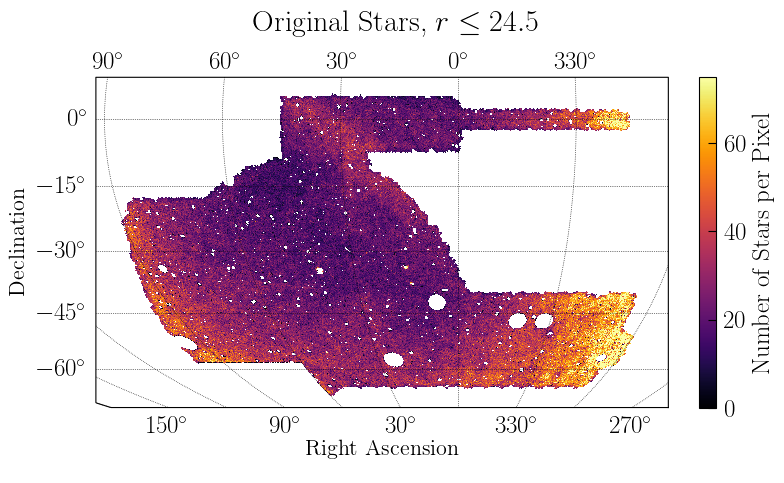

In [69]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspStarOrig, cmap = 'inferno')
plt.clim(starMin, starMax)
plt.colorbar(location = 'right', label = 'Number of Stars per Pixel', fraction = 0.0267)
fig.suptitle(r'Original Stars, $r\leq 24.5$', y = 0.9)
plt.show()

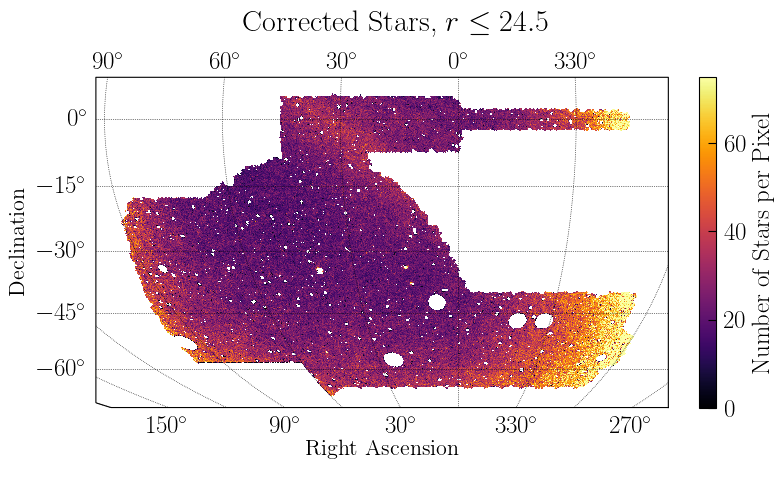

In [70]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspStarCorr, cmap = 'inferno')
plt.clim(starMin, starMax)
plt.colorbar(location = 'right', label = 'Number of Stars per Pixel', fraction = 0.0267)
fig.suptitle(r'Corrected Stars, $r\leq 24.5$', y = 0.9)
plt.show()

In [71]:
# # The default DES projection is a McBrydeSkymap.
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax)
# sp.draw_hspmap(hspStarRatio, cmap = 'viridis')
# plt.clim(0.5, 2)
# plt.colorbar(location = 'right', label = 'Effective Weight', fraction = 0.0267)
# fig.suptitle(r'Effective Weights Stars, $23.9 < r\leq 24.5$', y = 0.9)
# plt.show()

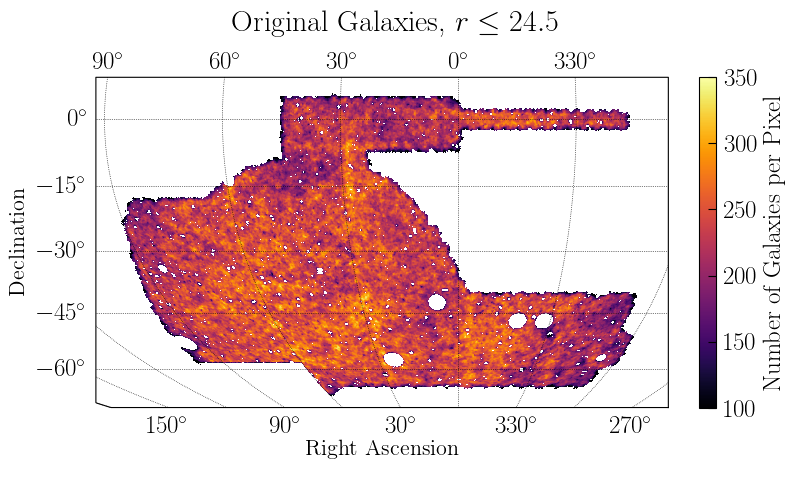

In [72]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspGalaOrig, cmap = 'inferno')
plt.clim(galaMin, galaMax)
plt.colorbar(location = 'right', label = 'Number of Galaxies per Pixel', fraction = 0.0267)
fig.suptitle(r'Original Galaxies, $r\leq 24.5$', y = 0.9)
plt.show()

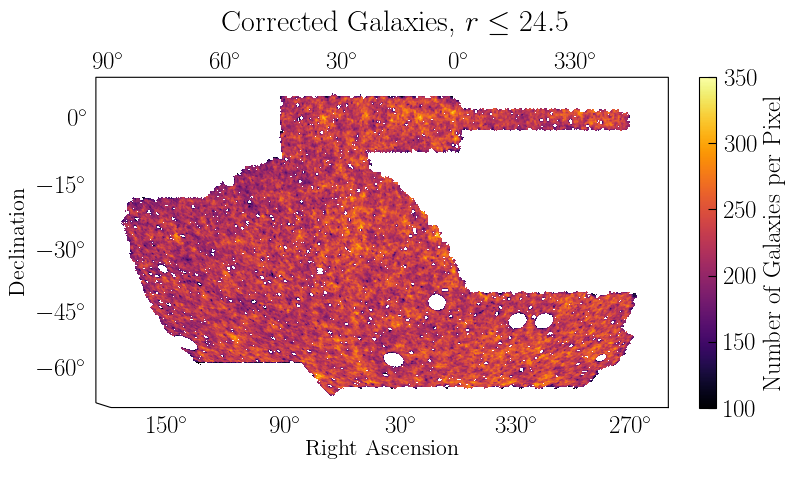

In [73]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax, gridlines = False)
sp.draw_hspmap(hspGalaCorr, cmap = 'inferno')
plt.clim(galaMin, galaMax)
plt.colorbar(location = 'right', label = 'Number of Galaxies per Pixel', fraction = 0.0267)
fig.suptitle(r'Corrected Galaxies, $r\leq 24.5$', y = 0.9)
plt.show()

## Probability Correlations

In [74]:
# len(deStarDetAsStarProb[2])

In [75]:
# len(deStarDetAsAnyProb)

In [76]:
# plt.figure(dpi = 120)
# plt.hist2d(deStarDetAsStarProb[2], deStarDetAsGalaProb[2], bins = np.linspace(.5, 1.5, 100), cmap = 'Blues', zorder = 3)
# plt.plot([0.5, 1.5], [0.5, 1.5], color = 'black', linestyle = (0, (5, 10)), zorder = 3)
# # plt.grid(zorder = 0)
# plt.title('Relative Detection Probability Correlations')
# plt.xlabel('Stars Classified as Stars')
# plt.ylabel('Stars Classified as Galaxies')
# plt.show()

## Getting Three Areas of Sky

In [77]:
# allPix = np.where(fullOrigStar > 0)[0]
# pixRatios = starRatio[allPix]

In [78]:
# sortInds = pixRatios.argsort()

In [79]:
# sortAllPix = allPix[sortInds[::1]]

In [80]:
# numAreas = 10
# binIndLims = [0]

# for i in range(numAreas):
#     binIndLims.append(int((len(sortAllPix) - binIndLims[-1]) / (numAreas - i)) + (binIndLims[-1]))

In [81]:
# # Might crop one off so all can be stored in one fits file
# storeLen = binIndLims[1]
# directory = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/FinalPipeline/Tests/Object_Counts/'
# areaFile = directory + 'Ten_Areas_Pixels.fits'

# my_table = Table()
# for i in np.arange(numAreas):
#     storePix = sortAllPix[binIndLims[i]:binIndLims[i+1]]
#     if len(storePix) > storeLen:
#         storePix = storePix[1:]
#     my_table[str(i)] = storePix
# my_table.write(areaFile, overwrite = True)

## Phoenix and Background

In [82]:
# testRa, testDec = hp.pixelfunc.pix2ang(nsideCourse, np.arange(12*(nsideCourse**2)), nest=True, lonlat=True)
# testPix = np.where((testRa >= 26) & (testRa <= 29) & (testDec >= -50) & (testDec <= -45))[0]

In [83]:
# strPixFile = strConfig.phoenixFile
# backPixFile = strConfig.backgroundFile

In [84]:
# strPix = fitsio.read(strPixFile)['PIX']
# backPix = fitsio.read(backPixFile)['PIX']

In [85]:
# np.sum(np.isin(testPix, strPix))

In [86]:
# testPix = testPix[~np.isin(testPix, strPix)]

In [87]:
# corrTest = fullCorrStar[testPix]
# origTest = fullOrigStar[testPix]

# testCrop = np.where(corrTest >= 0)[0]

# corrTest = corrTest[testCrop]
# origTest = origTest[testCrop]

In [88]:
# corrStream = fullCorrStar[strPix]
# corrBack = fullCorrStar[backPix]

# origStream = fullOrigStar[strPix]
# origBack = fullOrigStar[backPix]

# strCrop = np.where(corrStream >= 0)[0]
# backCrop = np.where(corrBack >= 0)[0]

# corrStream = corrStream[strCrop]
# corrBack = corrBack[backCrop]

# origStream = origStream[strCrop]
# origBack = origBack[backCrop]

In [89]:
# plt.figure(dpi = 120)
# plt.hist(origStream, bins = np.linspace(10, 50, 41), density = True, alpha = 0.5)
# plt.hist(origBack, bins = np.linspace(10, 50, 41), density = True, alpha = 0.5)
# plt.show()

In [90]:
# plt.figure(dpi = 120)
# plt.hist(corrStream, bins = np.linspace(10, 50, 41), density = True, alpha = 0.5)
# plt.hist(corrBack, bins = np.linspace(10, 50, 41), density = True, alpha = 0.5)
# plt.show()